In [1]:
pip install niapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 176 kB 4.8 MB/s 


In [2]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=5c6a12c0873e4841e096e94da0b46476b03ac88a51c5a94efccf3683247a347e
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn


In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,cross_val_score
#import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import make_regression
import numpy as np 
SEED = 1412 

In [5]:
My_data = make_regression(n_samples=10000,n_features=5,noise=20,shuffle=False,random_state=SEED)

In [6]:
X,y = My_data

In [7]:
print(type(X),type(y))
print(np.shape(X),np.shape(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(10000, 5) (10000,)


In [8]:
My_df = pd.DataFrame(X)
My_df['Answer'] = y 
My_df.head()

,0,1,2,3,4,Answer
0,0.336519,0.506932,-0.098258,-0.705595,1.111341,-22.967532
1,-0.766724,1.079198,-2.110384,-0.651977,-1.507014,-47.108606
2,0.907954,-1.134633,-0.024841,-0.759466,0.792219,57.044234
3,0.152845,0.589673,0.017292,-0.347116,1.795686,48.562507
4,-0.970435,-0.894919,0.856573,-1.839290,1.422043,-70.238923


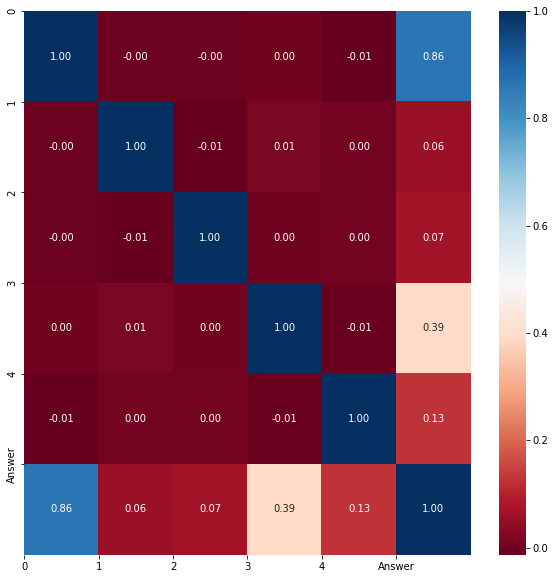

In [9]:
corr = My_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns)
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [11]:
scaler = StandardScaler()

In [12]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

LR = LinearRegression()
SDGR = SGDRegressor()
RFR = RandomForestRegressor()

split 1

In [14]:
from sklearn.ensemble import AdaBoostRegressor
from niapy.problems import Problem
from niapy.task import OptimizationType, Task
from niapy.algorithms.modified import HybridBatAlgorithm


def get_hyperparameters(x):
    """
    Function to get hyperparameters from x value.
    base_estimator, n_estimators, learning_rate, and loss
    """
    print(f'x -> \n{x}')
    
    bases = (LR, SDGR, RFR)
    base_estimator = bases[int(x[0] * (len(bases)-1))]
    n_estimators = int(x[1] * 100 + 1)
    learning_rate = x[2] * 3 + 0.000001
    losses = ('linear', 'square', 'exponential')
    loss = losses[int(x[3] * 2)]


    params = {
        'base_estimator': base_estimator,
        'n_estimators': n_estimators,
        'learning_rate' : learning_rate,
        'loss': loss,
    }
    print(f'Para -> \n{params}')

    return params


def get_regressor(x):
    """     generate regressor berdasarkan hyperparameter yang dipilih.     """
    params = get_hyperparameters(x)
    return AdaBoostRegressor(**params)

In [15]:
class ABRHyperparameterOptimization(Problem):
    def __init__(self, X_train, y_train):
        super().__init__(dimension=4, lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train

    def _evaluate(self, x):
        model = get_regressor(x)
        scores = cross_val_score(model, self.X_train, self.y_train, cv=5, n_jobs=-1)
        return scores.mean()

In [16]:
problem = ABRHyperparameterOptimization(X_train, y_train)

# akan menjalankan maksimalisasi untuk 100 iterasi pada permasalahan dengan populasi 10
task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)

algorithm = HybridBatAlgorithm(population_size=10, seed=1234)
best_params_HBA, best_accuracy = algorithm.run(task)
 
print('Best parameters:', get_hyperparameters(best_params_HBA))

x -> 
[0.97669977 0.38019574 0.92324623 0.26169242]
Para -> 
{'base_estimator': SGDRegressor(), 'n_estimators': 39, 'learning_rate': 2.7697397012918663, 'loss': 'linear'}
x -> 
[0.31909706 0.11809123 0.24176629 0.31853393]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 12, 'learning_rate': 0.7252998797583553, 'loss': 'linear'}
x -> 
[0.96407925 0.2636498  0.44100612 0.60987081]
Para -> 
{'base_estimator': SGDRegressor(), 'n_estimators': 27, 'learning_rate': 1.323019366160534, 'loss': 'square'}
x -> 
[0.8636213  0.86375767 0.67488131 0.65987435]
Para -> 
{'base_estimator': SGDRegressor(), 'n_estimators': 87, 'learning_rate': 2.024644940049085, 'loss': 'square'}
x -> 
[0.7357577  0.22275366 0.17206618 0.87041497]
Para -> 
{'base_estimator': SGDRegressor(), 'n_estimators': 23, 'learning_rate': 0.5161995539834157, 'loss': 'square'}
x -> 
[0.06013866 0.68368891 0.67123802 0.61101798]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 69, 'learning_rate': 2.0137

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


x -> 
[0.         0.10776817 1.         0.        ]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 11, 'learning_rate': 3.000001, 'loss': 'linear'}
x -> 
[0.11543353 0.90996562 0.         0.97557182]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 91, 'learning_rate': 1e-06, 'loss': 'square'}
x -> 
[0.31909706 1.         0.         1.        ]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 101, 'learning_rate': 1e-06, 'loss': 'exponential'}
x -> 
[0.34760024 1.         0.         1.        ]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 101, 'learning_rate': 1e-06, 'loss': 'exponential'}
x -> 
[1.         0.59820159 1.         0.        ]
Para -> 
{'base_estimator': RandomForestRegressor(), 'n_estimators': 60, 'learning_rate': 3.000001, 'loss': 'linear'}
x -> 
[1.         0.         0.9782424  0.23227644]
Para -> 
{'base_estimator': RandomForestRegressor(), 'n_estimators': 1, 'learning_rate': 2.9347282002822532, 'loss'

In [17]:
default_model = AdaBoostRegressor()
best_model_HBA = get_regressor(best_params_HBA)

default_model.fit(X_train, y_train)
best_model_HBA.fit(X_train, y_train)

x -> 
[0.         0.01187018 1.         0.02658115]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 2, 'learning_rate': 3.000001, 'loss': 'linear'}


AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=3.000001,
                  n_estimators=2)

x -> 
[0.         0.01187018 1.         0.02658115]
Para -> 
{'base_estimator': LinearRegression(), 'n_estimators': 2, 'learning_rate': 3.000001, 'loss': 'linear'}
AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=3.000001,
                  n_estimators=2)

In [18]:
default_score_train = default_model.score(X_train, y_train)
best_score_HBA_train = best_model_HBA.score(X_train, y_train)

print('Default model accuracy:', default_score_train)
print('Best model accuracy:', best_score_HBA_train)

Default model accuracy: 0.8854112778241907
Best model accuracy: 0.9220828106693932


In [19]:
default_score_test = default_model.score(X_test, y_test)
best_score_HBA_test = best_model_HBA.score(X_test, y_test)

print('Default model accuracy:', default_score_test)
print('Best model accuracy:', best_score_HBA_test)

Default model accuracy: 0.8870039842792379
Best model accuracy: 0.9241481691007984
